In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("housing.csv")
print(df)
print(type(df))

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [3]:
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [ ]:
#insted of mapping median_house_values we are creating dummies of the column
x = df.drop("median_house_value", axis=1)
y = df["median_house_value"]
x = pd.get_dummies(x, columns=["ocean_proximity"])
print(x.dtypes)

longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
ocean_proximity_<1H OCEAN        bool
ocean_proximity_INLAND           bool
ocean_proximity_ISLAND           bool
ocean_proximity_NEAR BAY         bool
ocean_proximity_NEAR OCEAN       bool
dtype: object


In [ ]:
#splitting the data into test and train 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.30, random_state=42)

In [ ]:
#data imputed
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

In [ ]:
#Using the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_imputed, y_train)

reg_pred = model.predict(x_test_imputed)



In [26]:
##cross validation
from sklearn.model_selection import cross_val_score

mse = cross_val_score(model,x_train_imputed,y_train,
scoring="neg_mean_squared_error",cv=10)

rmse = np.sqrt(-mse.mean())
rmse

np.float64(69036.58437703582)

In [23]:
##prediction 
reg_pred=model.predict(x_test_imputed)
print(reg_pred)



[ 65642.72419714 134022.56580413 263670.60309059 ... 283840.43397153
 113960.40616162 219047.40125173]


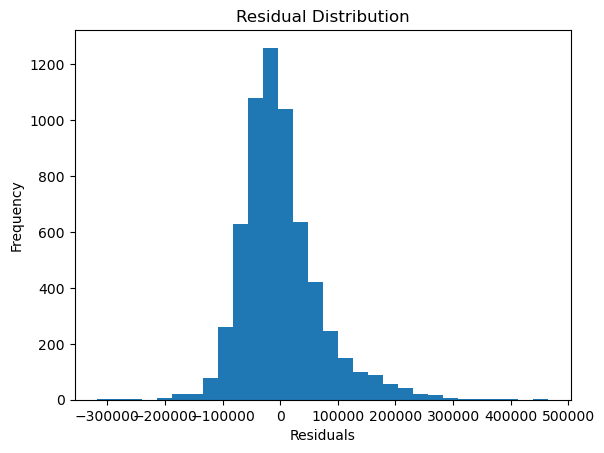

In [27]:
#visualization
residuals = y_test - reg_pred
plt.figure()
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

In [29]:
# R2 Score of the model
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
score



0.6395768324695243